# 3 The Self-organizing Map (SOM)

In this task, we will implement some python functions for the self-organizing map (SOM), or self-organizing feature map, algorithm. The SOM is an artificial neural network used for clustering and dimensionality reduction. Its goal is to find a high-quality topological respresentation of the input space (also called _map_).

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist, euclidean


np.random.seed(42)

## 3.1 The Dataset
First, we will load the [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) that we will use for training our SOM. We will also apply the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) that scales all features to zero mean and unit variance.

In [2]:
iris = datasets.load_iris()
iris_data = iris.data

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 3.2 Data Preprocessing
Let's instantiate a StandardScaler object and preprocess the data accordingly.

In [4]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data)

So, how does a sample look like when the scaling operation is applied?

In [5]:
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

In [6]:
iris_scaled[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

## 3.3 The Self-organizing Map Object
Now it's time to take a step further and get to know object-oriented Python programming. What you can see below is that we define our self-organizing map as a Python class that has the attributes 
- _size_ (number of nodes in the network), 
- _sigma_ (neighborhood learning coefficient whose value is dependent on the current iteration), 
- _nodes_ (list of all nodes in the network), and 
- _learning rate_ (determines how much other nodes are pulled towards the input).

Also, the SOM class consists of several functions that are needed for training. Your job will be to implement the following four functions:

### Task 3.3.1
`neighborhood_function(self, v, n_b)` (takes the indices of the current network node $v$ and the winning node $n_b$, outputs the Gaussian neighboorhood pull factor according to $h(v, n_b) = - exp \left( -\frac{d_{v, n_b}^2}{2 \cdot \sigma^2} \right)$, where $d_{v, n_b}$ is the Euclidean distance between the $v$-th and $n_b$-th network node)

### Task 3.3.2 
`find_winner(self, x)` (takes the current input sample and returns the index $n_b$ of the closest node in the network)

### Task 3.3.3
`update_network(self, x, n_b)` (takes the current input sample and the index of the winner and updates all network nodes based on the input)

### Task 3.3.4
`plot(self)` (scatter plot of first two dimensions of the nodes in the network)

In [26]:
class SOM:
    
    def __init__(self, rows, columns, dim, lr):
        self.size = rows * columns
        self.sigma = 1
        self.nodes = np.random.normal(size=(rows * columns, dim))

        # learning rate
        self.lr = lr
        
    def neighborhood_function(self, v, n_b):
        dist = np.linalg.norm(v-n_b)
        h = -np.exp(-(dist/2*self.sigma**2))
        return h
    
    def find_winner(self, x):
        return (self.nodes - x).argmin()
    
    def update_network(self, x, n_b):
        for i in range(self.size):
            self.nodes[i] += self.lr * self.neighborhood_function(i, n_b) * (x - self.nodes[i])
     
    def plot(self):
        plt.scatter(self.nodes[:, 0], self.nodes[:, 1])
        plt.xlabel("X") # TODO: find fitting Label
        plt.ylabel("Y") # TODO: find fitting Label
        plt.title("SOM Algorithm Result")
        plt.show()

## 3.4 Test SOM Algorithm
With the code given below, you can test your implemented functions with different learning rates / neighboorhood size adjustments. The steps below are the same ones as described in Lecture 20 (_Self-organizing Networks_). 

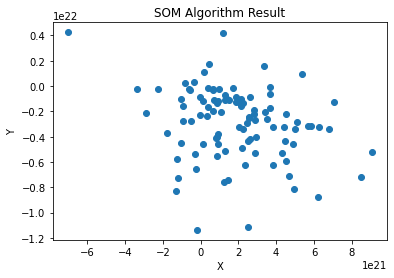

In [27]:
# Step 1: Initialize Network (10 x 10 nodes, learning rate 0.5)
som = SOM(10, 10, iris_data.shape[1], 0.5)
  
# Step 2: Get Input
for x in iris_scaled:
    
    # Step 3: Find Winner
    n_b = som.find_winner(x)
    
    # Step 4: Update winner and neighborhood
    som.update_network(x, n_b)
    
    # Step 5: Adjust neighborhood size
    som.sigma /= 1.1
    
# Step 6: Plot network
som.plot()   

_Hint 1: As this is an unsupervised learning method, you don't have to worry about accuracies etc., as long as your code works as described in the SOM lecture slides._

_Hint 2: When plotting the network, don't forget to add labels and title to the plot!_

Good luck with this task!